In this notebook we want to solve the data alignment problem experimentally.

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


[-1.75010804 -2.9174812 ]
[-4.70947386 -1.52344133]
(1000, 2)
(2, 1000)
(2, 1000)


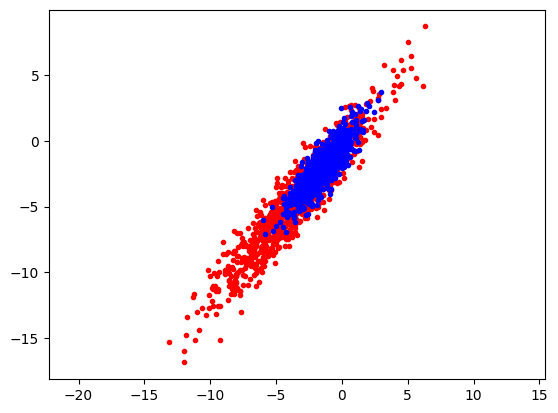

In [25]:
# Set the mean and covariance matrix
mu1 = np.random.rand(2)*10 - 5
mu2 = np.random.rand(2)*10 - 5
cov1 = np.random.rand(2, 2) * 10 - 5
cov2 = np.random.rand(2, 2) * 10 - 5

#make sure COV is psd
cov1 = np.dot(cov1, cov1.T)
cov2 = np.dot(cov2, cov2.T)

print(mu1)
print(mu2)

pi1 = np.random.rand()
pi2 = 1 - pi1


# Generate samples from a multivariate Gaussian distribution
z = pi1*np.random.multivariate_normal(mu1, cov1, size=1000) + pi2*np.random.multivariate_normal(mu2, cov2, size=1000)
print(z.shape)
s1 = np.random.rand(2,2)
s2 = np.random.rand(2,2)

x1 = s1 @ z.T
print(x1.shape) 
x2 = s2 @ z.T
print(x2.shape)
x1 = x1.T
x2 = x2.T

plt.plot(x1[:,0], x1[:,1], 'r.')
plt.plot(x2[:,0], x2[:,1], 'b.')
plt.axis('equal')
plt.show()

In [36]:
X = np.hstack([x1, -x2]).T
print(X.shape)

# Now solve AX = 0, where A is k x d, X is d x n, and n > d, d = d1+d2 (dim of modality and modality 2) and n is the number of samples

# Take the SVD of X
U, s, Vt = np.linalg.svd(X, full_matrices=False)
print(U.shape, s.shape, Vt.shape)
print(s)

# If we are trying to approximate a latent space of k dimensions
# The last 2 rows of U are the basis for the null space of X in row space
A = U[2:,:]
print(A.shape)
A1 = A[:, :2]
A2 = A[:, 2:]

print("Given a sample x1[0] = ", x1[0])
print("The corresponding latent space representation is A1x=", np.dot(A1, x1[0].T))
print("Given a sample x2[0] = ", x2[0])
print("The corresponding latent space representation is A2x=", np.dot(A2, x2[0].T))

error = np.linalg.norm(np.dot(A, X))
print("The error is from each other is: ", error)

print("The error from true S1 is: ", np.linalg.norm(np.linalg.inv(s1) @ x1[0].T - A1 @ x1[0].T))
print("The error from true S2 is: ", np.linalg.norm(np.linalg.inv(s2) @ x2[0].T - A2 @ x2[0].T))

(4, 1000)
(4, 4) (4,) (4, 1000)
[2.54145399e+02 3.14024602e+01 6.79737749e-14 2.66473339e-14]
(2, 4)
Given a sample x1[0] =  [-0.43635036 -0.8073535 ]
The corresponding latent space representation is A1x= [-0.58410268 -0.08549799]
Given a sample x2[0] =  [-0.34658855 -0.30641449]
The corresponding latent space representation is A2x= [-0.34695351 -0.07067072]
The error is from each other is:  82.14011460640391
The error from true S1 is:  0.513659926394423
The error from true S2 is:  0.48478374028794324


In [4]:
# Let's put the above into a function that given k,d1,d2, and X, returns A1 and A2

def solveAX0(X, k, d1, d2):
    # Make sure X is d1+d2 x n
    # print(X.shape, d1,d2)
    assert X.shape[0] == d1+d2
    U, s, Vt = np.linalg.svd(X, full_matrices=False)
    A = U[k:,:]
    A1 = A[:, :d1]
    A2 = A[:, d1:]
    error =  np.linalg.norm(np.dot(A, X))
    return A1, A2, error

def gen_data(d1=2,d2=2, n =1000):
    # we are assuming 2 classes, and hidden dimension of 2
    num_classes = 2
    hidden_dim = 2

    # Set the mean and covariance matrix
    mu1 = np.random.rand(d1)*10 - 5
    mu2 = np.random.rand(d1)*10 - 5
    cov1 = np.random.rand(d1, d1) * 10 - 5
    cov2 = np.random.rand(d2, d2) * 10 - 5

    #make sure COV is psd
    cov1 = np.dot(cov1, cov1.T)
    cov2 = np.dot(cov2, cov2.T)

    pi1 = np.random.rand()
    pi2 = 1 - pi1

    # Generate samples from a multivariate Gaussian distribution
    x1 = np.random.multivariate_normal(mu1, cov1, size=int(n))
    x2 = np.random.multivariate_normal(mu2, cov2, size=int(n))

    X = np.hstack([x1, -x2]).T
    return X

X = gen_data(2,2,1000)
A1, A2, error = solveAX0(X, 2, 2, 2)
print("The error is: ", error)


The error is:  224.24168883856117


1000.0
[74.63470166668266, 94.55828196136636, 70.95539649831395, 175.3674728758965, 143.65275284161268, 140.2466813597432, 213.17969897846703, 153.71470989933033, 238.67912016008555, 180.90370320326693]


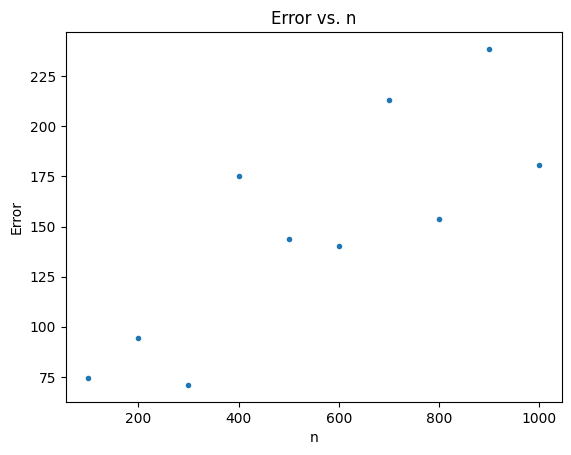

In [5]:
# As n increases the error increases
errors = []
n_vals = np.linspace(100, 1000, 10)
k = 2
d1 = 2
d2 = 2
for n in n_vals:
    X = gen_data(d1,d2,n)
    A1, A2, error = solveAX0(X, k, d1, d2)
    errors.append(error)

plt.figure()
plt.title("Error vs. n")
plt.xlabel("n")
plt.ylabel("Error")
plt.plot(n_vals, errors, '.')
print(n)
print(errors)



[  50.  100.  150.  200.  250.  300.  350.  400.  450.  500.  550.  600.
  650.  700.  750.  800.  850.  900.  950. 1000.]
[3198.572924388781, 6432.881780768167, 9643.848665188183, 12927.563840397943, 16194.275163906248, 19307.06072448547, 22596.47580698458, 25773.18429354107, 28977.967754486148, 32242.973838849997, 35489.21535004974, 38672.5373280405, 41940.31127830467, 45101.75550650895, 48377.05586880496, 51621.19960679285, 54854.437760728295, 57895.14421757453, 61456.59641817066, 64551.54531144578]


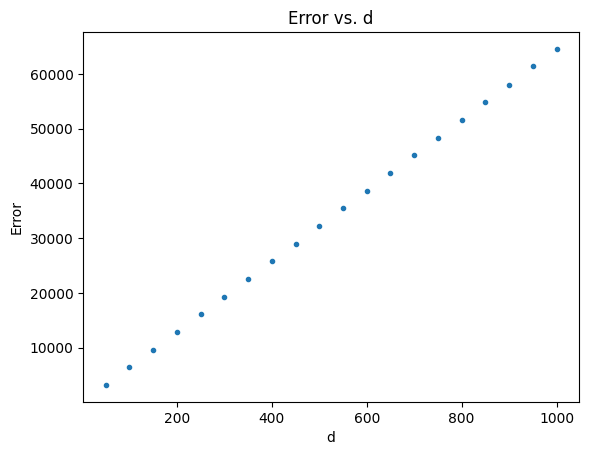

In [6]:
# As d increases, the error increases
errors = []
d_vals = np.linspace(0, 1000, 21)[1:]
k = 2
n =1000
for d in d_vals:
    d1 = d2 = int(d//2)
    X = gen_data(d1,d2,n)
    # print(X.shape)
    # print(d1,d2)
    A1, A2, error = solveAX0(X, k, d1, d2)
    errors.append(error)

plt.figure()
plt.title("Error vs. d")
plt.xlabel("d")
plt.ylabel("Error")
plt.plot(d_vals, errors, '.')

print(d_vals)
print(errors)

In [76]:
np.linspace(0, 1000, 21)


array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
        450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
        900.,  950., 1000.])

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[331.57232529614436, 236.45222228474648, 178.7489424781238, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


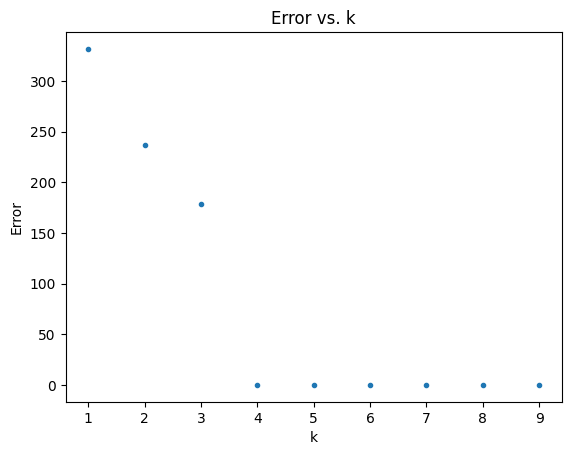

In [10]:
# As k increases,
errors = []
k_vals = list(range(1, 10))
d1 = 2
d2 = 2
n =1000
for k in k_vals:
    X = gen_data(d1,d2,n)
    A1, A2, error = solveAX0(X, int(k), d1, d2)
    errors.append(error)

plt.figure()
plt.title("Error vs. k")
plt.xlabel("k")
plt.ylabel("Error")
plt.plot(k_vals, errors, ".")

print(k_vals)
print(errors)
